##### Bag of Words(BoW) 
- 단어의 등장 순서를 고려하지 않는 빈도수 기반의 텍스트 데이터의 수치화 방법
- 가방에 단어들을 넣으면 순서가 중요하지 않음
- 각 단어에 고유한 인덱스를 부여하고
- 각 인덱스의 위치에 단어의 출현 횟수를 저장

In [1]:
from konlpy.tag import Okt
import re
okt=Okt()
token=re.sub("[.!#~]","", '비가 오니 마음이 차분해지네요. 요즘 너무 더웠어요. 비가 오니 마음이 기쁘네요.')
#형태소 분석
token=okt.morphs(token)
word2index={} #단어 사전(단어와 숫자 인덱스)
bow=[] #단어 가방(단어와 출현 횟수)
for voca in token:
    #사전에 없는 단어 추가
    if voca not in word2index.keys():
        word2index[voca]=len(word2index)
        #단어의 인덱스와 출현횟수(기본값:1)
        bow.insert(len(word2index)-1,1)
    else:
        #재등장하는 단어의 인덱스
        index=word2index.get(voca)
        #단어 카운트 증가
        bow[index]=bow[index]+1

print(word2index)

{'비': 0, '가': 1, '오니': 2, '마음': 3, '이': 4, '차분해지네요': 5, '요즘': 6, '너무': 7, '더웠어요': 8, '기쁘네요': 9}


In [2]:
#단어의 출현 횟수
print(bow)

[2, 2, 2, 2, 2, 1, 1, 1, 1, 1]


In [10]:
from sklearn.feature_extraction.text import CountVectorizer
#문서 집합에서 단어 토큰을 생성하고 각 단어의 수를 세어 BOW 인코딩한 벡터를 만드는 클래스
corpus=['모처럼 전국에 비가 내리고 있습니다.']
line=['전국에 비가']
vector = CountVectorizer()
vector.fit(corpus)
print(vector.vocabulary_) # 단어사전
print(vector.transform(line).toarray()) #단어가 출현한 위치에 1 표시

{'모처럼': 1, '전국에': 4, '비가': 2, '내리고': 0, '있습니다': 3}
[[0 0 1 0 1]]


In [4]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = ['''모처럼 전국에 비가 내리고 있습니다.
대부분 밤까지 계속되기 때문에 종일 우산이 필요하겠는데요.
비의 양도 많고 바람도 강하게 불기 때문에 작은 우산 말고 큰 우산 챙기는 게 더 좋습니다. ''']
#문서 집합에서 단어 토큰을 생성하고 각 단어의 수를 세어 BOW 인코딩한 벡터를 만드는 클래스
vector = CountVectorizer()
# 코퍼스로부터 각 단어의 빈도수 계산
#단어들의 출현 횟수
print(vector.fit_transform(corpus).toarray())
# 만들어진 단어와 인덱스
print(vector.vocabulary_)

[[1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1]]
{'모처럼': 7, '전국에': 18, '비가': 11, '내리고': 2, '있습니다': 16, '대부분': 3, '밤까지': 9, '계속되기': 1, '때문에': 4, '종일': 19, '우산이': 15, '필요하겠는데요': 22, '비의': 12, '양도': 13, '많고': 5, '바람도': 8, '강하게': 0, '불기': 10, '작은': 17, '우산': 14, '말고': 6, '챙기는': 21, '좋습니다': 20}


In [5]:
#공백 단위로 나누어지므로 한국어의 경우 정확도가 떨어짐(비슷한 단어들도 별도로 집계됨)
f=open('c:/data/text/news1.txt')
corpus=f.read()
txt=okt.nouns(corpus)
txt2=[' '.join(txt)]
txt2

['츄파춥스 콤 사탕 전 세계 사랑 브랜드 스페인 출시 지금 무려 개국 가지 종류 맛 판매 올해 주년 글로벌 브랜드 츄파춥스 우리나라 중소기업 핸드 허그 라이선스 계약 소식 달 츄파춥스 로고 사탕 그림 생활용품 구류 등 여개 종 상품 달 시중 판매 예정 라이선스 계약 상표 브랜드 이미지 사용 특정 지역 제품 범위 한해 제조 유통 허가 권리 획득 것 말 인지도 저명성 츄파춥스 지식 재산 활용 것 요 핸드 허그 제품 판매 금액 일정 부분 츄파춥스 방식 계약 기간 내년 츄파춥스 그동안 각종 의류 식료품 회사 콜라보 한국 이처럼 상품 출시 건 처음 설립 핸드 허그 크리에이터 커머스 플랫폼 캐릭터 제작 여개 크리에이터 팀 손 잡고 편의점 상품 등 각종 굿 를 판매 이름 일례 꽃카 캐릭터 빵 편의점 출시 사랑 핸드 허그 츄파춥스 글로벌 브랜드 협업 라이선스 브랜드 론칭하 건 처음 그동안 확보 시장 내 영향력 전문성 활용 계획 츄파춥스 계약 핸드 허그 제품 생산 유통 디자인 마케팅 물류 인프라 원스톱 시스템 때문']

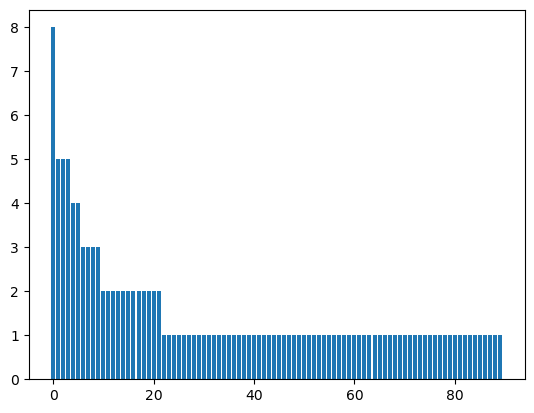

[('츄파춥스', 8), ('브랜드', 5), ('허그', 5), ('핸드', 5), ('계약', 4), ('판매', 4), ('라이선스', 3), ('상품', 3), ('출시', 3), ('제품', 3), ('사탕', 2), ('사랑', 2), ('캐릭터', 2), ('크리에이터', 2), ('여개', 2), ('처음', 2), ('각종', 2), ('활용', 2), ('글로벌', 2), ('유통', 2), ('그동안', 2), ('편의점', 2), ('잡고', 1), ('제조', 1), ('제작', 1), ('전문성', 1), ('인프라', 1), ('저명성', 1), ('재산', 1), ('일례', 1), ('일정', 1), ('인지도', 1), ('종류', 1), ('가지', 1), ('중소기업', 1), ('지금', 1), ('지식', 1), ('지역', 1), ('이처럼', 1), ('커머스', 1), ('콜라보', 1), ('특정', 1), ('플랫폼', 1), ('한국', 1), ('한해', 1), ('허가', 1), ('협업', 1), ('확보', 1), ('주년', 1), ('이미지', 1), ('올해', 1), ('의류', 1), ('물류', 1), ('무려', 1), ('마케팅', 1), ('론칭하', 1), ('로고', 1), ('때문', 1), ('디자인', 1), ('방식', 1), ('내년', 1), ('기간', 1), ('금액', 1), ('그림', 1), ('권리', 1), ('구류', 1), ('계획', 1), ('개국', 1), ('꽃카', 1), ('이름', 1), ('범위', 1), ('사용', 1), ('원스톱', 1), ('우리나라', 1), ('회사', 1), ('예정', 1), ('영향력', 1), ('식료품', 1), ('시중', 1), ('부분', 1), ('시장', 1), ('스페인', 1), ('소식', 1), ('세계', 1), ('설립', 1), ('생활용품', 1), ('생산', 1), ('상표', 1

In [6]:
import numpy as np
import matplotlib.pyplot as plt
vect = CountVectorizer().fit(txt2)
#bow의 출현횟수 합계
cnt = vect.transform(txt2).toarray().sum(axis=0)
idx = np.argsort(-cnt) #카운트 내림차순 정렬
cnt = cnt[idx]
# x축의 단어이름
feature_name = np.array(vect.get_feature_names_out())[idx]
plt.bar(range(len(cnt)), cnt)
plt.show()
print(list(zip(feature_name,cnt)))

In [7]:
#불용어 추가
vector = CountVectorizer(stop_words=['여개'])
print(vector.fit_transform(txt2).toarray())
print(vector.vocabulary_)

[[1 2 1 4 1 1 1 2 1 2 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 5 2 1 2 1 3 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 2 3 8 2
  1 1 2 1 4 2 1 1 1 5 1 5 1 1 2 1 1]]
{'츄파춥스': 70, '사탕': 28, '세계': 34, '사랑': 26, '브랜드': 25, '스페인': 36, '출시': 69, '지금': 65, '무려': 20, '개국': 2, '가지': 0, '종류': 62, '판매': 76, '올해': 43, '주년': 63, '글로벌': 9, '우리나라': 44, '중소기업': 64, '핸드': 81, '허그': 83, '라이선스': 16, '계약': 3, '소식': 35, '로고': 17, '그림': 8, '생활용품': 32, '구류': 5, '상품': 30, '시중': 39, '예정': 42, '상표': 29, '이미지': 49, '사용': 27, '특정': 75, '지역': 67, '제품': 61, '범위': 23, '한해': 80, '제조': 60, '유통': 46, '허가': 82, '권리': 6, '획득': 88, '인지도': 51, '저명성': 57, '지식': 66, '재산': 56, '활용': 86, '금액': 10, '일정': 54, '부분': 24, '방식': 22, '기간': 11, '내년': 13, '그동안': 7, '각종': 1, '의류': 47, '식료품': 40, '회사': 87, '콜라보': 73, '한국': 79, '이처럼': 50, '처음': 68, '설립': 33, '크리에이터': 74, '커머스': 72, '플랫폼': 78, '캐릭터': 71, '제작': 59, '잡고': 55, '편의점': 77, '이름': 48, '일례': 53, '꽃카': 12, '협업': 84, '론칭하': 18, '확보': 85, '시장': 38, '영향력': 41, '전문